In [1]:
#import all libraries needed

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV


In [16]:
# Collect data into usable matrices
neg_folder = 'aclImdb/test/neg'
pos_folder = 'aclImdb/test/pos'

# Initialize empty lists to store the text and labels
reviews = []
labels = []

# Read and preprocess positive reviews
for filename in os.listdir(pos_folder):
    with open(os.path.join(pos_folder, filename), 'r', encoding='utf-8') as file:
        review = file.read()
        # Preprocess the review as needed
        # For example, you can remove punctuation and convert to lowercase
        review = review.lower()
        # Append the preprocessed review and label to the lists
        reviews.append(review)
        labels.append(1)  # 1 for positive review


# Read and preprocess negative reviews
for filename in os.listdir(neg_folder):
    with open(os.path.join(neg_folder, filename), 'r', encoding='utf-8') as file:
        review = file.read()
        # Preprocess the review as needed
        # For example, you can remove punctuation and convert to lowercase
        review = review.lower()
        # Append the preprocessed review and label to the lists
        reviews.append(review)
        labels.append(0)  # 0 for negative review

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X = vectorizer.fit_transform(reviews)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)




In [18]:
# Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Perform k-fold cross-validation
k = 5
cross_val_scores = cross_val_score(logreg, X_train, y_train, cv=k)

# Average accuracy
avg_accuracy = cross_val_scores.mean()

print(f"Logistic Regression - Cross-validated accuracy for each fold: {cross_val_scores}")
print(f"Logistic Regression - Average cross-validated accuracy: {avg_accuracy:.4f}")


Logistic Regression - Cross-validated accuracy for each fold: [0.86575 0.8655  0.85575 0.86475 0.8675 ]
Logistic Regression - Average cross-validated accuracy: 0.8639


Test accuracy for C=0.01: 0.7938
Test accuracy for C=0.1: 0.8490
Test accuracy for C=1: 0.8624
Test accuracy for C=10: 0.8618
Test accuracy for C=100: 0.8560


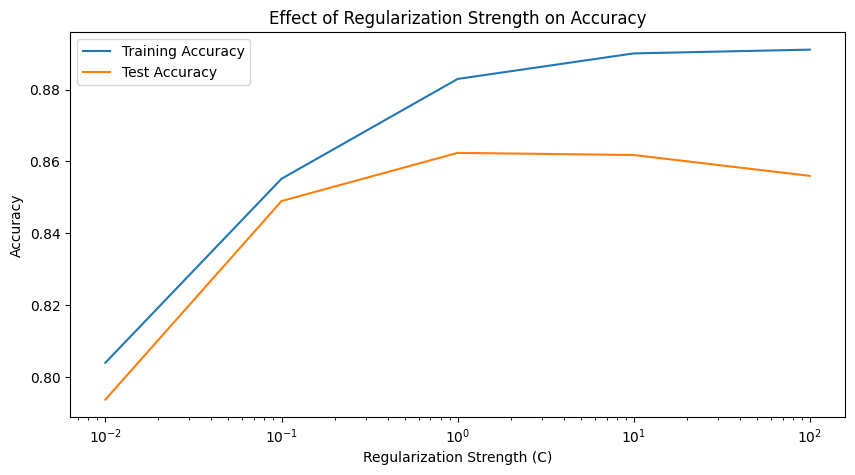

In [17]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# List of regularization strengths to try
C_values = [0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

# Loop over the values of C
for C_val in C_values:
    # Create and train the logistic regression model with the current value of C
    logreg = LogisticRegression(max_iter=1000, C=C_val, class_weight='balanced', penalty='l2')
    logreg.fit(X_train, y_train)
    
    # Evaluate and store the scores
    train_scores.append(logreg.score(X_train, y_train))
    test_scores.append(logreg.score(X_test, y_test))

# Print the test scores for each value of C
for C_val, score in zip(C_values, test_scores):
    print(f"Test accuracy for C={C_val}: {score:.4f}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(C_values, train_scores, label='Training Accuracy')
plt.plot(C_values, test_scores, label='Test Accuracy')
plt.xscale('log')  # Use a log scale for the C values
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization Strength on Accuracy')
plt.legend()
plt.show()


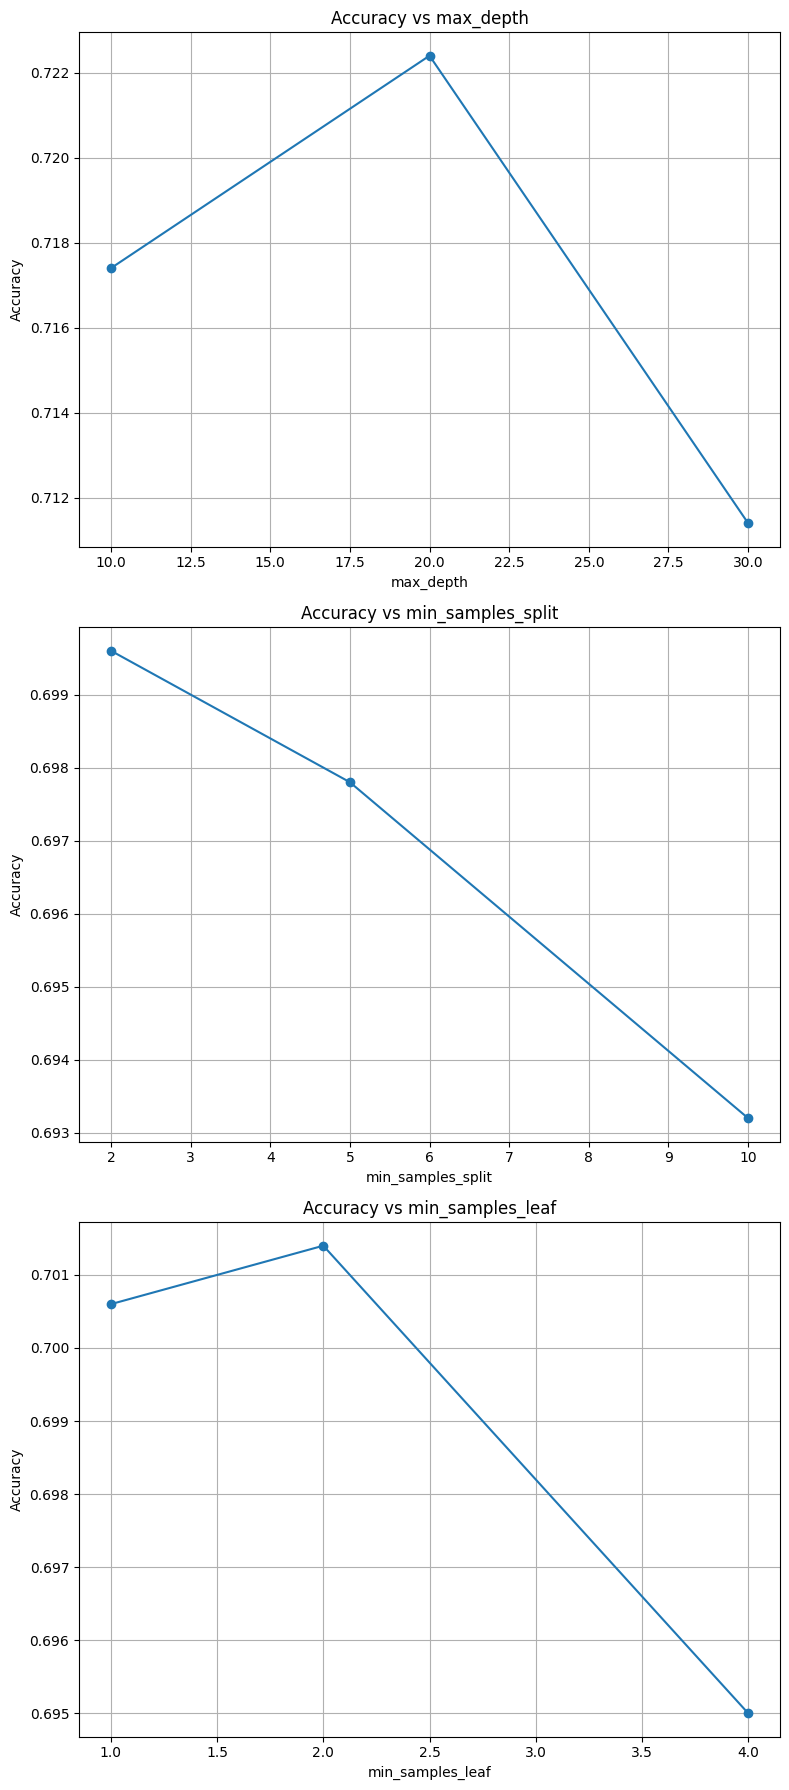

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

param_values = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Plot the change in accuracy for each hyperparameter
fig, axes = plt.subplots(nrows=len(param_values), ncols=1, figsize=(8, 6 * len(param_values)))

for i, (param_name, param_range) in enumerate(param_values.items()):
    accuracy_values = []

    for value in param_range:
        # Create a DecisionTreeClassifier with the current hyperparameter value
        dt_classifier = DecisionTreeClassifier(**{param_name: value})

        # Train the model and compute accuracy
        dt_classifier.fit(X_train, y_train)
        y_pred = dt_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)

    # Plot the accuracy values for the current hyperparameter
    axes[i].plot(param_range, accuracy_values, marker='o')
    axes[i].set_title(f'Accuracy vs {param_name}')
    axes[i].set_xlabel(param_name)
    axes[i].set_ylabel('Accuracy')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [22]:
# Create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier
dtree = DecisionTreeClassifier(max_depth=20, min_samples_split=2, min_samples_leaf=2)

# Train the model
k = 5
cross_val_scores = cross_val_score(dtree, X_train, y_train, cv=k)

# Average accuracy
avg_accuracy = cross_val_scores.mean()

print(f"Decision Tree - Cross-validated accuracy for each fold: {cross_val_scores}")
print(f"Decision Tree - Average cross-validated accuracy: {avg_accuracy:.4f}")

Decision Tree - Cross-validated accuracy for each fold: [0.733   0.72675 0.702   0.7325  0.7225 ]
Decision Tree - Average cross-validated accuracy: 0.7234


In [ ]:
#Support Vector Machines (LinearSVC)
from sklearn.svm import LinearSVC

svc_model = LinearSVC(dual=False)
svc_model.fit(X_train, y_train)

train_accuracy = svc_model.score(X_train, y_train)
test_accuracy = svc_model.score(X_test, y_test)

print(f"LinearSVC - Training accuracy: {train_accuracy:.4f}")
print(f"LinearSVC - Test accuracy: {test_accuracy:.4f}")


In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=0)

# Train AdaBoost
ada_clf.fit(X_train, y_train)

# Get training and test accuracies
train_accuracy = ada_clf.score(X_train, y_train)
test_accuracy = ada_clf.score(X_test, y_test)

print("AdaBoost - Training accuracy:", round(train_accuracy, 4))
print("AdaBoost - Test accuracy:", round(test_accuracy, 4))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Get training and test accuracies
train_accuracy_rf = rf_clf.score(X_train, y_train)
test_accuracy_rf = rf_clf.score(X_test, y_test)

print(f"Random Forest - Training accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest - Test accuracy: {test_accuracy_rf:.4f}")


In [ ]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Train the Gradient Boosting classifier
gb_clf.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy = gb_clf.score(X_train, y_train)
print(f"Gradient Boosting - Training accuracy: {train_accuracy:.4f}")

# Calculate test accuracy
test_accuracy = gb_clf.score(X_test, y_test)
print(f"Gradient Boosting - Test accuracy: {test_accuracy:.4f}")
